In [1]:
"""
CODE FOR LSNaNIS
INPUT = X (WHOLE DATASET)
OUTPUT = S (BEST INSTANCES)


PARAMETERS:
X = TRAINING DATA WITH d-DIMENSIONAL FEATURE SPACE
n = LENGTH OF TRAINING DATASET
Y = CLASS LABELS
l(x) = FUNCTION RETURNING THE CLASS LABEL OF SAMPLE x
NaN(x) = SET OF NATURAL NEIGHBOURS OF SAMPLE x
Nb(x) = RECORDS NUMBER OF SAMPLE x THAT IS CONSIDERED AS THE NEIGHBOR OF OTHER SAMPLES
NN_r = r NEAREST NEIGHBORS OF SAMPLE x
RNN_r = r REVERSE NEAREST NEIGHBORS OF SAMPLE x
LAMBDA_VALUE = NATURAL NEIGHBOR EIGENVALUE
k = NUMBER OF NEAREST NEIGHBORS OF SAMPLES
LS(x) = LOCAL SET CONTAINING NaN AND x
LSC(x) = INSTANCE NUMBER IN LS(x)

"""

'\nCODE FOR LSNaNIS\nINPUT = X (WHOLE DATASET)\nOUTPUT = S (BEST INSTANCES)\n\n\nPARAMETERS:\nX = TRAINING DATA WITH d-DIMENSIONAL FEATURE SPACE\nn = LENGTH OF TRAINING DATASET\nY = CLASS LABELS\nl(x) = FUNCTION RETURNING THE CLASS LABEL OF SAMPLE x\nNaN(x) = SET OF NATURAL NEIGHBOURS OF SAMPLE x\nNb(x) = RECORDS NUMBER OF SAMPLE x THAT IS CONSIDERED AS THE NEIGHBOR OF OTHER SAMPLES\nNN_r = r NEAREST NEIGHBORS OF SAMPLE x\nRNN_r = r REVERSE NEAREST NEIGHBORS OF SAMPLE x\nLAMBDA_VALUE = NATURAL NEIGHBOR EIGENVALUE\nk = NUMBER OF NEAREST NEIGHBORS OF SAMPLES\nLS(x) = LOCAL SET CONTAINING NaN AND x\nLSC(x) = INSTANCE NUMBER IN LS(x)\n\n'

In [2]:
import numpy as np

name_of_file = 'Image3.txt' # Input name of file
d = 2 # Dimension of the dataset

whole_training_set = np.genfromtxt(name_of_file, delimiter=',',dtype=None, encoding=None)
#whole_training_set = np.genfromtxt(name_of_file)
#print(whole_training_set)
branch_one_list = []
for i in range(len(whole_training_set)):
    branch_one_list.append([whole_training_set[i][-1]])
branch_one = np.array(branch_one_list)
branch_two_list = []
for i in range(len(whole_training_set)):
    branch_two_list.append([whole_training_set[i][0],whole_training_set[i][1]])
branch_two = np.array(branch_two_list)
#print(branch_two)

X = branch_two

In [3]:
"""
Some Useful Functions

"""
# To find the intersection of 2 lists
def intersection(lst1, lst2): 
    ac = cC([tuple(x) for x in lst1])
    bc = cC([tuple(x) for x in lst2])
    lst3 = sorted([list(x) for x, v in (ac & bc).items() for _ in range(v)])
    return lst3



# To get the class label
def l(x,X,branch_one):
    pos = np.where(X == x) #X_list.index(x)
    #print(pos[0][0])
    #print(pos)
    return branch_one[pos[0][0]]


# TO get a new reduced set of class labels
def newClassLabel(EX_array, X, branch_one_list):
    position_list = []
    branch_one_new_list = []
    for ele in EX_array:
        if ele in X:
            pos = np.where(X == ele)
            position_list.append(pos[0][0])
    #print(len(position_list))
    for pos in position_list:
        branch_one_new_list.append(branch_one_list[pos])
    #print(len(branch_one_new_list))
    branch_one_new_array = np.array(branch_one_new_list)
    return branch_one_new_array


# Returns the LS(x)
def LS_x(x, LS):
    for i in range(len(LS)):
        if isinstance(LS[i][-1], list) == True:
            #print(((np.array(LS[i][-1])).flatten()).tolist()) #.tolist())
            k = ((np.array(LS[i][-1])).flatten())
        else:
            k = LS[i][-1]
        #print("Hmm", x , LS[i][-1])
        #print(LS[i][-1].tolist(),"\t",x)
        if x == k.tolist(): #LS[i][-1].tolist():
            LS[i][-1] = k
            return LS[i]

    

In [4]:
"""
Code for LS_Search
INPUT = X
OUTPUT = LS, LSC, LAMBDA_VALUE

"""

from sklearn.neighbors import KDTree
from collections import Counter as cC


def LS_Search(X):
    num = 0
    # INITIALISING PARAMETERS AND VALUES FOR EACH x IN X
    r = 1 
    Nb = [[0] for i in range(len(X))]
    NN = [[] for i in range(len(X))]
    RNN = [[] for i in range(len(X))]
    NaN = [[] for i in range(len(X))]
    LS = [[] for i in range(len(X))]
    LSC = [[] for i in range(len(X))]
    #print(Nb[0][0] + 1)

    T = KDTree(X, leaf_size=40)  #Create a k-d tree T from dataset X

    exit = False

    while exit == False:
        num_orig = num
        Nb = [[0] for i in range(len(X))]
        NN = [[] for i in range(len(X))]
        RNN = [[] for i in range(len(X))]
        for i in range(len(X)):
            dist, ind = T.query(X, k=r+1)
            j = ind[i][1]
            x_j = X[j]
            #print(x_j)
            NN[i].append(x_j) 
            Nb[j] = [Nb[j][0] + 1]
            RNN[j].append(X[i]) 

            #print(Nb)

        num = 0
        #print(num)
        for i in range(len(Nb)):
            if Nb[i] == [0]:
                num += 1

        #print(num, num_orig)
        if num == num_orig:
            LAMBDA_VALUE = r
            for k in range(len(X)):
                temp1 = intersection(RNN[k],NN[k])
                if len(temp1) != 0:
                    NaN[k] = temp1
                    LS[k].append(NaN[k])
                else:
                    NaN[k] = [] 
                LS[k].append(X[k]) 
                LSC[k] = len(LS[k])
            #print(len(LS), len(LSC))   ## Should output the dataset size
            exit = True
        else:
            r += 1
        

    return LS, LSC, LAMBDA_VALUE


In [5]:
#LS, LSC, LAMBDA_VALUE = LS_Search(X)
#print(LS)
#Reqd_value = LS_x([2.5876, 3.1725], LS)
#print(Reqd_value)

In [6]:
"""
Code for LS_Edit
Input = X
Output = EX(Edited X)

"""

EX_list = [] #Initialized EX as Null
Noise_list = [] #For storing the noisy instances
LS, LSC, LAMBDA_VALUE = LS_Search(X)
def LS_Edit(X, branch_one):
    for i in range(len(X)):
        if LSC[i] > 1:
            if NF(X[i], LSC[i], LS[i], X, branch_one) <= 0.5:
                EX_list.append(X[i])
            else:
                Noise_list.append(X[i])
        else:
            Noise_list.append(X[i])
    EX = np.array(EX_list)
    Noise = np.array(Noise_list)
    return EX, Noise

def NF(x, LSC_x, LS_x, X,branch_one):
    Num = 0
    for y in range(len(LS_x)):
        if l(LS_x[y],X,branch_one) != l(x,X,branch_one):
            Num += 1
    Noisy_Factor = Num / LSC_x
    return Noisy_Factor


In [7]:
EX, Noise = LS_Edit(X,branch_one)
LS, LSC, LAMBDA_VALUE = LS_Search(EX)
print("Length of Dataset = ",len(X))
print("Length of EX = ",len(EX))
print("Length of Noise = ",len(Noise))
print("Length of New LS = ",len(LS))
print("Length of New LSC = ",len(LSC))
LAMBDA_VALUE_ORIG = LAMBDA_VALUE
print("LAMBDA VALUE = ",LAMBDA_VALUE_ORIG)


Length of Dataset =  10000
Length of EX =  6234
Length of Noise =  3766
Length of New LS =  6234
Length of New LSC =  6234
LAMBDA VALUE =  1


In [8]:
"""
CODE FOR LS_BORDER
INPUT = EX, LS, LSC
OUTPUT = CBEX(CONDENSED BORDER SAMPLES IN EX), IEX(INTERNAL SAMPLES IN EX)

"""

def Degree_border(x, LS_x, EX, branch_one_new):
    Num = 0
    for y in LS_x:
        if l(y, EX, branch_one_new) != l(x, EX, branch_one_new):
            Num += 1
    #print(Num)
    return Num
    

def get_y(x, LS_x, EX, branch_one_new):
    y_list = []
    for y in LS_x:
        if l(y, EX, branch_one_new) == l(x, EX, branch_one_new):
            y_list.append(y)
    return y_list


    

def LS_Border(EX, LS, LSC, branch_one_new):
    Degree_border_num_list = []
    Border = []
    CBEX = []
    IEX = []
    for x in EX:
        x = x.tolist()
        #print(x)
        LS_x_val = LS_x(x,LS)
        #print(LS_x_val)
        if Degree_border(x, LS_x_val, EX, branch_one_new) > 0:
            Border.append(x)
            Degree_border_num_list.append(Degree_border(x, LS_x(x,LS), EX, branch_one_new))
        else:
            IEX.append(x)
            
    #print(len(Border))
    #print(len(IEX))
    
    if len(Border) != 0:
        Border_sorted = [x for _, x in sorted(zip(Degree_border_num_list,Border), key=lambda pair: pair[0], reverse = True)]
        Border_sorted_array = np.array(Border_sorted)
        for x in Border_sorted_array:
            x = x.tolist()
            LS_x_val = LS_x(x,LS)
            y_list = get_y(x, LS_x_val, EX, branch_one_new)
            if len(intersection(CBEX, y_list)) == 0:
                CBEX.append(x)
            
    print(len(CBEX), len(IEX))
    CBEX_array = np.array(CBEX)
    IEX_array = np.array(IEX)
    return CBEX_array, IEX_array



In [9]:
branch_one_new = newClassLabel(EX, X, branch_one_list)
CBEX , IEX = LS_Border(EX, LS, LSC, branch_one_new)
LS, LSC, LAMBDA_VALUE = LS_Search(IEX)
#print(LS)

504 5730


In [10]:
#print(X)
#print("\n\n")
#print(IEX)
#LS_x([-20.339, 6.7695],LS)

In [11]:
"""
CODE FOR LS_CORE
INPUT = IEX (INTERNAL SAMPLES IN EX), LS, LSC, LAMBDA_VALUE
OUTPUT = CIEX (CONDENSED INTERNAL SAMPLES IN EX)

"""

from itertools import chain 

def get_new_cluster_c(x, LS_x, IEX, branch_one_new2, cluster ):
    new_cluster_c = []
    for y in LS_x:
        if y in IEX and l(y,IEX,branch_one_new2) == l(x, IEX, branch_one_new2) and in_an_existing_cluster(y,cluster) == False:
            new_cluster_c.append(y) 
    return new_cluster_c
            
    
def in_an_existing_cluster(x, cluster):
    for subl in cluster:
        for subl1 in subl:
            if isinstance(subl1, list) == False:
                subl1 = subl1.tolist()
            if isinstance(x, list) == False:
                x = x.tolist()
            if [x] == subl1 or x == subl1:
                return True
    return False


def LS_Core(IEX, LS, LSC, LAMBDA_VALUE):
    # Initializing as Null
    CIEX = []
    cluster = []

    IEX_sorted = [x for _, x in sorted(zip(LSC,IEX), key=lambda pair: pair[0], reverse = True)]
    IEX_sorted_array = np.array(IEX_sorted) 
    
    pos = 0
    for x in IEX_sorted:
        x = x.tolist()
        if cluster == []:
            LS_x_val = LS_x(x,LS)
            cluster.append(get_new_cluster_c(x, LS_x_val, IEX, branch_one_new2, cluster))
            current_pos = pos
            pos += 1
        else:
            if in_an_existing_cluster(x, cluster):
                continue
            else:
                LS_x_val = LS_x(x,LS)
                cluster.append(get_new_cluster_c(x, LS_x_val, IEX, branch_one_new2, cluster))
                current_pos = pos
                pos += 1
        
        idx = np.where(IEX_sorted_array == x)
        unassigned_samples = []
        
        for i in range(idx[0][0], len(IEX_sorted)):
            unassigned_samples.append(IEX_sorted[i])
            
        for z in unassigned_samples:
            z = z.tolist()
            z1 = z
            z = [z]
            c = []
            cluster_len_orig = len(cluster[current_pos])
            for subl in cluster[current_pos]:
                if isinstance(subl, list) == False:
                        subl = subl.tolist()
                c.append(subl)
            c[-1] = [c[-1]]
            
            
            if get_z(z, c):
                LS_x_val = LS_x(z1,LS)
                for y in LS_x_val:
                    if y in IEX and l(y,IEX,branch_one_new2) == l(z1, IEX, branch_one_new2) and in_an_existing_cluster(y,cluster) == False:
                        print(y)
                        cluster[current_pos].append(y)
            if cluster_len_orig == len(cluster[current_pos]):
                break
    
    if len(cluster) > LAMBDA_VALUE:     ## OR > = ??
        for i in range(len(cluster)):
            temp = []
            for j in range(len(cluster[i])):
                if isinstance(cluster[i][j],list) == False:
                    cluster[i][j] = cluster[i][j].tolist()
                if test_dim(cluster[i][j]) > 1:
                    flat = [x for sublist in cluster[i][j] for x in sublist]
                    temp.append(flat)
                else:
                    temp.append(cluster[i][j])

            temp_array = np.array(temp)  
            #result = get_mean(temp_array)  ## For the mean thing
            result = no_mean(temp_array)  ## Without the mean thing
            ## Exclusing mean
            for ele in result:
                CIEX.append(ele)
            #CIEX.append(result)  

    
    print(len(CIEX))   ## Uncommented it
    CIEX_array = np.array(CIEX)
    return CIEX_array
       

    
def get_mean(temp_array):
    result = []
    row = temp_array.shape[0]
    col = temp_array.shape[1]
    for d in range(col):
        sum_val = 0
        for i in range(row):
            sum_val += temp_array[i][d]
        avg_val = sum_val / 2
        result.append(avg_val)
    #print(result)
    return result  


def no_mean(temp_array):
    result = []
    result1 = temp_array.tolist()
    for ele in result1:
        #print(ele)
        result.append(ele)
    #print(result)
    return result
    
    
    
def test_dim(testlist, dim=0):
    if isinstance(testlist, list):
        if testlist == []:
            return dim
        dim = dim + 1
        dim = test_dim(testlist[0], dim)
        return dim
    else:
        if dim == 0:
            return -1
        else:
            return dim

            

def get_z(z, c):
    LS_x_val = LS_x(z[0],LS)
    count = 0
    LS_x_val[-1] = [LS_x_val[-1]]
    for ele in LS_x_val:
        for ele_c in c:
            if len(intersection(ele_c, ele)) != 0:
                count += 1
                
    if count >= (len(LS_x_val) / 2) and l(c[0][0], IEX, branch_one_new2) == l(z[0], IEX, branch_one_new2):
        return True
    else:
        return False


In [12]:
branch_one_new2 = newClassLabel(IEX, X, branch_one_list)
CIEX = LS_Core(IEX, LS, LSC, LAMBDA_VALUE_ORIG)


5730


In [13]:
def LSNaNIS(CBEX, CIEX):
    # Initializing as Null
    S = []
    S = CBEX.tolist() + CIEX.tolist()
    #print(len(S))
    S_array = np.array(S)
    S_array = np.array(S)
    return S_array, len(S_array)

In [14]:
S, len_S = LSNaNIS(CBEX, CIEX)
print(len_S)

6234


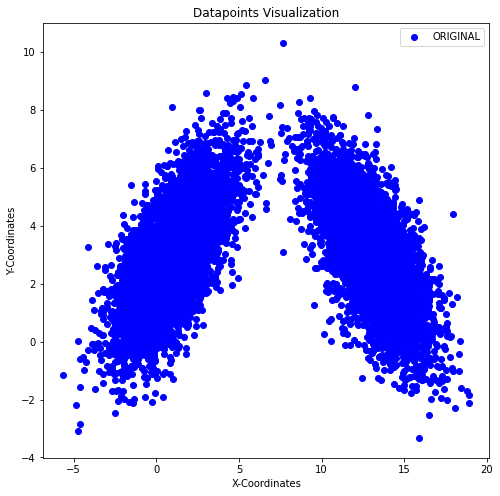

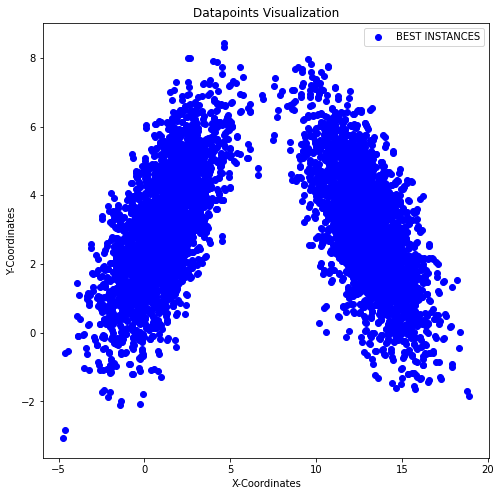

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#Noise_array = np.array(Noise)

if d == 2:
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c='blue', label='ORIGINAL')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('Datapoints Visualization')
    plt.legend()
    plt.show()
    
    
    
    """plt.figure(figsize=(8,8))
    if len(CBEX) != 0:
        plt.scatter(CBEX[:,0],CBEX[:,1],c='blue', label='BORDER POINTS')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('Datapoints Visualization')
    plt.legend()
    plt.show()

    
    plt.figure(figsize=(8,8))
    plt.scatter(CIEX[:,0], CIEX[:,1], c='blue', label='CORE POINTS')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('Datapoints Visualization')
    plt.legend()
    plt.show()"""
    
    plt.figure(figsize=(8,8))
    plt.scatter(S[:,0], S[:,1], c='blue', label='BEST INSTANCES')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('Datapoints Visualization')
    plt.legend()
    plt.show()
    
    
else:
    print("Higher Dimension cannot be displayed!!")